In [1]:
import pandas as pd

data = {
    'Time': pd.date_range(start='1/1/2023', periods=100),
    'Users': range(1, 101)
}
df = pd.DataFrame(data)


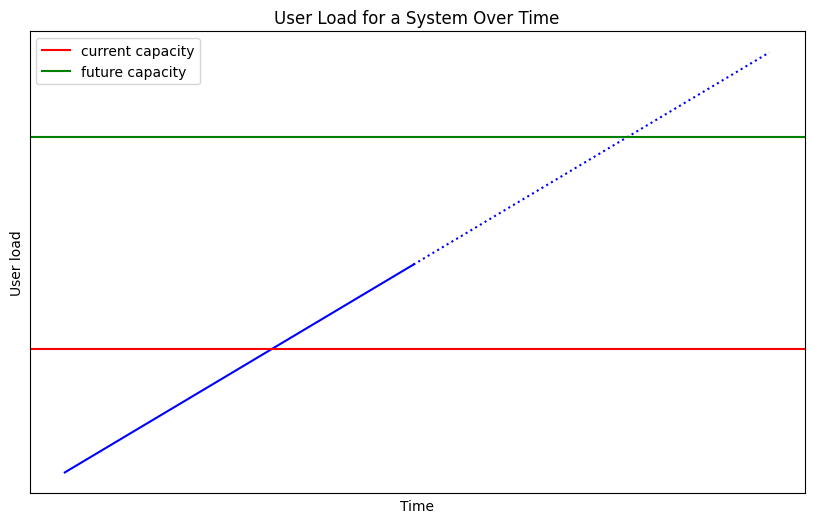

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Let's split the data to create a solid line and a dotted line at the halfway point.
df1 = df.iloc[:50]
df2 = df.iloc[49:]

plt.figure(figsize=(10, 6))

# Create the line plots.
sns.lineplot(x='Time', y='Users', data=df1, color='blue')
sns.lineplot(x='Time', y='Users', data=df2, color='blue', linestyle='dotted')

# Add the horizontal lines for current and future capacity.
plt.axhline(y=30, color='r', linestyle='-', label='current capacity')
plt.axhline(y=80, color='g', linestyle='-', label='future capacity')

# Add a legend
plt.legend()
plt.xticks([])  # hide x-axis labels
plt.yticks([])  # hide y-axis labels
# Set the labels and title
plt.xlabel('Time')
plt.ylabel('User load')
plt.title('User Load for a System Over Time')

plt.show()


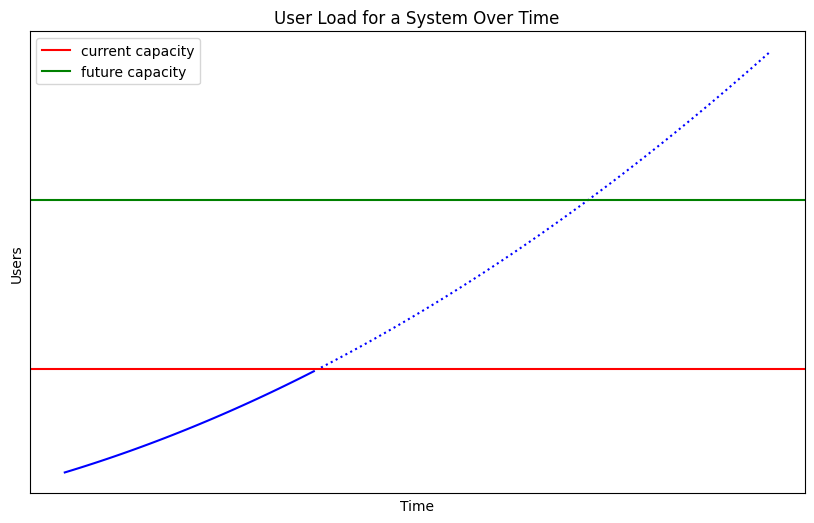

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    'Time': pd.date_range(start='1/1/2023', periods=100),
    'Users': np.linspace(1, 100, 100)  # generating linear space of 100 points between 1 and 100
}
df = pd.DataFrame(data)

def curve(x):
    return x + 0.01 * x**2

df['Users'] = curve(df['Users'])

transition_index = df[df['Users'] >= 50].index[0]  # finding index where user load reaches current capacity

df1 = df[df.index < transition_index]
df2 = df[df.index >= transition_index]

plt.figure(figsize=(10, 6))

sns.lineplot(x='Time', y='Users', data=df1, color='blue')
sns.lineplot(x='Time', y='Users', data=df2, color='blue', linestyle='dotted')

plt.axhline(y=50, color='r', linestyle='-', label='current capacity')
plt.axhline(y=130, color='g', linestyle='-', label='future capacity')

plt.legend()

plt.xticks([])  # hide x-axis labels
plt.yticks([])  # hide y-axis labels

plt.title('User Load for a System Over Time')

plt.savefig('capacity_scaling.pdf')
plt.show()
